## Setup

In [ ]:
!pip install fastai --upgrade

In [ ]:
import fastai
fastai.__version__

'2.1.8'

In [ ]:
# install the dependencies
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

In [ ]:
from zipfile import ZipFile
file_name = 'lgg-mri-segmentation.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision.all import *
from fastai.callback.hook import *

In [ ]:
save_path = 'saved_model'

In [ ]:
get_mask_path = lambda x : x.parents[0] / (x.stem + '_mask' + x.suffix)

In [ ]:
data_path = Path('/content/lgg-mri-segmentation/kaggle_3m')
smalldata_path = data_path / 'TCGA_CS_4941_19960909'

In [ ]:
smalldata_path.ls()

(#46) [Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_23.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_2.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_19.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15_mask.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_5_mask.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_18_mask.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_22.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_

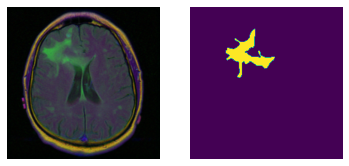

In [ ]:
sample_imgfile_path = smalldata_path/'TCGA_CS_4941_19960909_15.tif'
img = Image.open(sample_imgfile_path)
sample_maskfile_path = get_mask_path(sample_imgfile_path)
mask = Image.open(sample_maskfile_path)
show_images((img, mask))

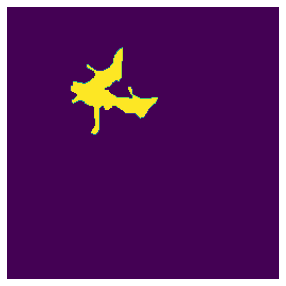

In [ ]:
show_image(mask, alpha=1)

In [ ]:
mask_t = cast(mask, TensorMask)
src_size = np.array(mask_t.shape)
src_size, mask_t.data

(array([256, 256]), TensorMask([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8))

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import gc
import humanize
import os
import GPUtil as GPU
import psutil

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=ebdc5e4f0d3f279528e51f443b270040d9d18adc4c556102245ed0e225b87c8e
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


In [ ]:
GPUs = GPU.getGPUs()
gpu = GPUs[0]
# XXX: only one GPU on Colab and isn’t guaranteed
def printm():
 process = psutil.Process(os.getpid())
 gc.collect()
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.7 GB  | Proc size: 328.4 MB
GPU RAM Free: 15069MB | Used: 10MB | Util   0% | Total 15079MB


In [ ]:
splitter = FuncSplitter(lambda posix_path: '_mask' in posix_path.name)
fnames = get_image_files(data_path)
images, masks = splitter(fnames)
images, masks = fnames[images], fnames[masks]
images, masks

((#3929) [Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_6.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_20.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_9.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_19.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_15.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_13.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_4.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_18.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_8.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_HT_7694_19950404/TCGA_HT_7694_19950404_11.tif')...],

In [ ]:
bs = 8
codes = ['n', 'y']

In [ ]:
tfms = [IntToFloatTensor(div_mask=255), Brightness(0.1, p=0.25), Zoom(max_zoom=1.1,p=0.25), Normalize.from_stats(*imagenet_stats)]

In [ ]:
dls = SegmentationDataLoaders.from_label_func(data_path, images, get_mask_path, item_tfms=[Resize(src_size//2, method=ResizeMethod.Squish)], batch_tfms=tfms, valid_pct=0.2, codes=codes, seed=42, bs=bs)

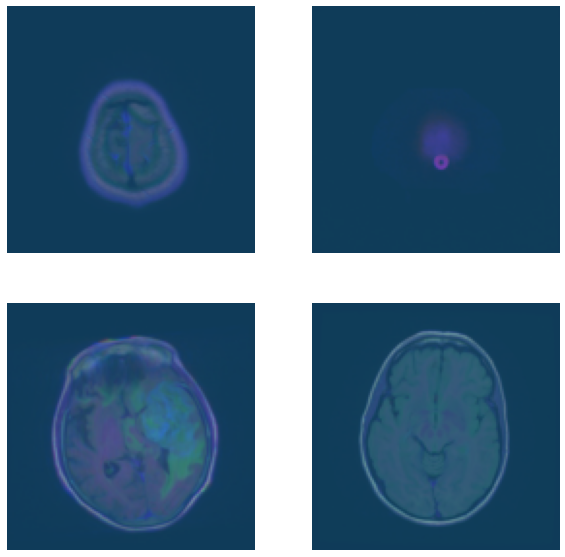

In [ ]:
dls.show_batch(max_n=4, figsize=(10, 10))

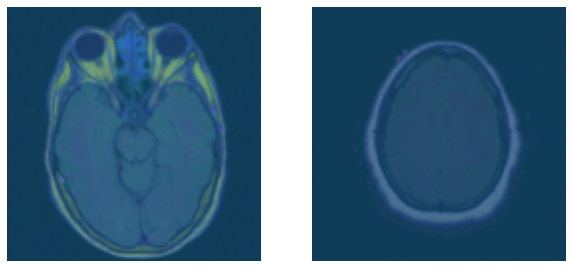

In [ ]:
dls.valid.show_batch(max_n=2, figsize=(10, 10))

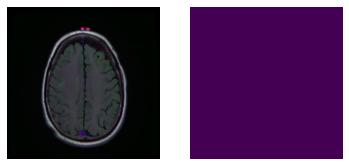

In [ ]:
show_images(dls.train_ds[2])

In [ ]:
t_mask = cast(dls.train_ds[2][1], TensorMask)
t_mask.argmax(dim=1)

TensorMask([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Models

### Metrics

In [ ]:
def acc_brain(input, target):
  target = target.squeeze(1)
  return (TensorBase(input.argmax(dim=1)) == TensorBase(target)).float().mean()

In [ ]:
class Dice(Metric): # fastai's Dice metric rewritten, bc of issue: https://github.com/fastai/fastai/issues/3041
    "Dice coefficient metric for binary target in segmentation"
    def __init__(self, axis=1): self.axis = axis
    def reset(self): self.inter,self.union = 0,0
    def accumulate(self, learn):
        pred,targ = flatten_check(learn.pred.argmax(dim=self.axis), learn.y)
        pred, targ = TensorBase(pred), TensorBase(targ)
        self.inter += (pred*targ).float().sum().item()
        self.union += (pred+targ).float().sum().item()

    @property
    def value(self): return 2. * self.inter/self.union if self.union > 0 else None

In [ ]:
metrics = [acc_brain, Dice()]

### ResNet18

In [ ]:
from fastai.vision.models import resnet18

learn18 = unet_learner(dls, resnet18, metrics=metrics, path=save_path)

SuggestedLRs(lr_min=0.0006309573538601399, lr_steep=1.737800812406931e-05)

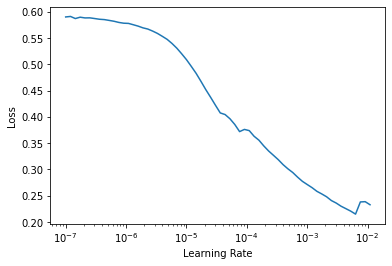

In [ ]:
learn18.lr_find()

In [ ]:
lr = 3e-5

In [ ]:
learn18.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.026226,0.026811,0.992716,0.424754,00:53
1,0.015821,0.012835,0.995342,0.727932,00:53
2,0.012179,0.014955,0.995389,0.706233,00:53
3,0.009983,0.015269,0.994575,0.619408,00:53
4,0.006694,0.009785,0.996929,0.830663,00:53
5,0.006597,0.008242,0.997269,0.848314,00:53
6,0.005559,0.007696,0.997384,0.863957,00:53
7,0.005405,0.007683,0.997451,0.861995,00:53
8,0.005119,0.007386,0.997543,0.868318,00:53
9,0.004844,0.007381,0.997531,0.869661,00:53


In [ ]:
learn18.save('stage18-1')

Path('saved_model/models/stage18-1.pth')

In [ ]:
learn18.load('stage18-1')

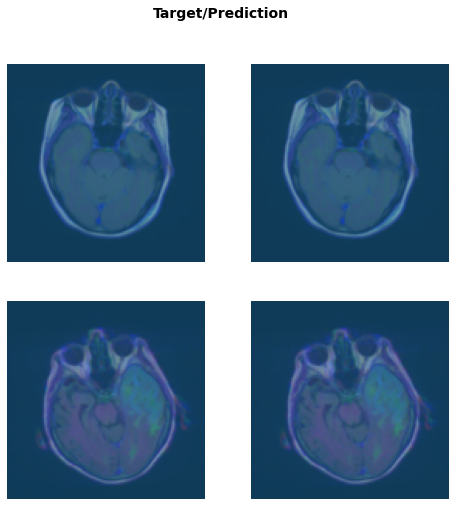

In [ ]:
learn18.show_results(max_n=8, figsize=(8,8))

In [ ]:
learn18.unfreeze()

In [ ]:
lrs = slice(lr/400, lr/4)

In [ ]:
learn18.fit_one_cycle(12, lrs)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.005130,0.007380,0.997535,0.868578,00:57
1,0.004696,0.007270,0.997508,0.868897,00:56
2,0.005124,0.008074,0.997409,0.856107,00:56
3,0.004763,0.007058,0.997574,0.869496,00:56
4,0.004720,0.008139,0.997521,0.863678,00:57
5,0.005051,0.007125,0.997639,0.874105,00:57
6,0.004652,0.007148,0.997652,0.874677,00:57
7,0.004482,0.007207,0.997650,0.874201,00:57
8,0.004429,0.006883,0.997723,0.879364,00:57
9,0.004298,0.007092,0.997668,0.877021,00:57


In [ ]:
learn18.save('stage18-2')

Path('saved_model/models/stage18-2.pth')

#### Full size

In [ ]:
bs = 4

In [ ]:
tfms = [IntToFloatTensor(div_mask=255), Brightness(0.1, p=0.25), Zoom(max_zoom=1.1, p=0.25), Normalize.from_stats(*imagenet_stats)]

In [ ]:
dls = SegmentationDataLoaders.from_label_func(data_path, images, get_mask_path, batch_tfms=tfms, valid_pct=0.2, codes=codes, seed=42, bs=bs)

In [ ]:
from fastai.vision.models import resnet18

learn18 = unet_learner(dls, resnet18, metrics=metrics, path=save_path)

In [ ]:
learn18.load('stage18-2')

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=7.585775847473997e-07)

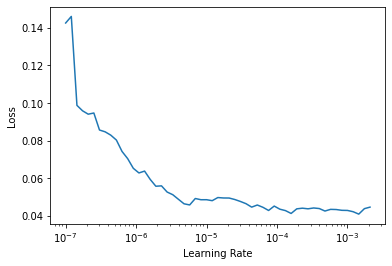

In [ ]:
learn18.lr_find()

In [ ]:
lr = 1e-4

In [ ]:
learn18.fit_one_cycle(10, slice(lr), pct_start=0.5)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.010598,0.011288,0.996045,0.793865,02:56
1,0.012618,0.012040,0.995184,0.681771,02:54
2,0.010193,0.012150,0.996115,0.759414,02:54
3,0.006950,0.008919,0.996794,0.814158,02:54
4,0.006973,0.007569,0.997444,0.866070,02:53
5,0.005476,0.007090,0.997587,0.871394,02:53
6,0.004276,0.007242,0.997729,0.878201,02:53
7,0.003932,0.007341,0.997810,0.881101,02:53
8,0.003319,0.006252,0.997960,0.892135,02:54
9,0.002958,0.006344,0.997972,0.893223,02:53


In [ ]:
learn18.save('stage18-1-big')

Path('saved_model/models/stage18-1-big.pth')

In [ ]:
learn18.load('stage18-1-big')

In [ ]:
learn18.unfreeze()

In [ ]:
lrs = slice(1e-6, lr/10)

In [ ]:
learn18.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.003260,0.006892,0.997949,0.890900,03:02
1,0.003224,0.006368,0.997984,0.892636,03:02
2,0.003315,0.006530,0.997991,0.894029,03:03
3,0.003238,0.006132,0.998028,0.896814,03:03
4,0.003182,0.007258,0.997985,0.892498,03:04
5,0.003246,0.006763,0.998021,0.894966,03:04
6,0.002817,0.006463,0.998058,0.897782,03:04
7,0.002571,0.006846,0.998008,0.894218,03:04
8,0.002635,0.006680,0.998029,0.895816,03:04
9,0.002797,0.006529,0.998065,0.897711,03:04


In [ ]:
learn18.save('stage18-2-big')

Path('saved_model/models/stage18-2-big.pth')

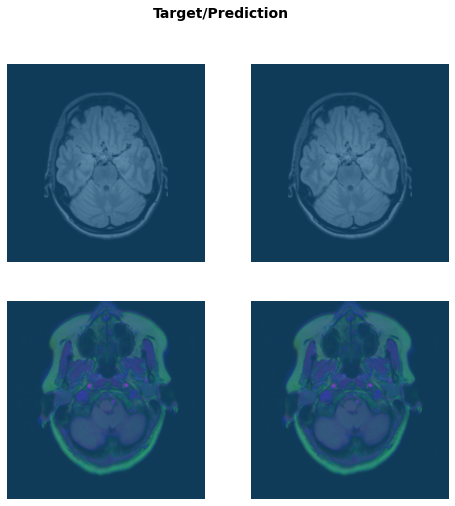

In [ ]:
learn18.show_results(figsize=(8, 8))

### ResNet34

#### Half size

In [ ]:
from fastai.vision.models import resnet34

learn34 = unet_learner(dls, resnet34, metrics=metrics, path=save_path)

SuggestedLRs(lr_min=0.001096478197723627, lr_steep=6.30957365501672e-05)

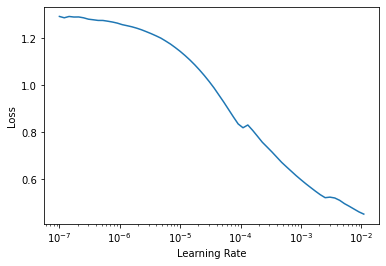

In [ ]:
learn34.lr_find()

In [ ]:
lr = 5e-5

In [ ]:
learn34.fit_one_cycle(10, slice(lr)) 

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.029232,0.021645,0.993267,0.522106,01:01
1,0.017837,0.024739,0.992807,0.420633,01:01
2,0.011367,0.018457,0.994003,0.562242,01:01
3,0.008706,0.008956,0.996687,0.835669,01:01
4,0.007399,0.007505,0.997175,0.852932,01:01
5,0.006218,0.007022,0.997405,0.862636,01:01
6,0.005443,0.006971,0.997540,0.867550,01:01
7,0.005084,0.006391,0.997630,0.876240,01:01
8,0.004646,0.006904,0.997665,0.874257,01:01
9,0.004490,0.006616,0.997693,0.877712,01:01


In [ ]:
learn34.save('stage34-1')

Path('saved_model/models/stage34-1.pth')

In [ ]:
learn34.load('stage34-1')

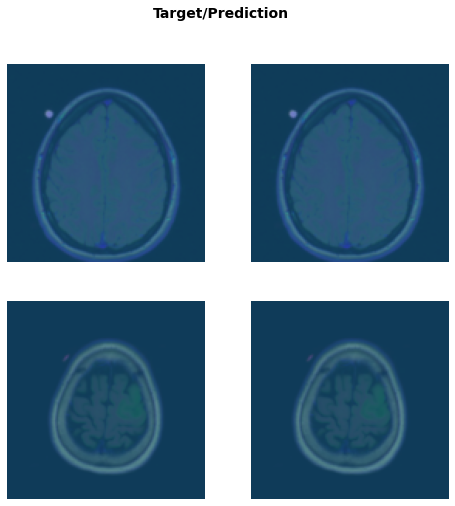

In [ ]:
learn34.show_results(max_n=8, figsize=(8,8))

In [ ]:
learn34.unfreeze()

In [ ]:
lrs = slice(lr/400, lr/4)

In [ ]:
learn34.fit_one_cycle(12, lrs, pct_start=0.1)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.004433,0.006765,0.997620,0.878567,01:08
1,0.004810,0.006534,0.997706,0.879146,01:07
2,0.004679,0.006801,0.997737,0.878745,01:06
3,0.004038,0.006764,0.997756,0.879651,01:06
4,0.004560,0.007116,0.997729,0.879096,01:06
5,0.004177,0.007270,0.997731,0.878380,01:06
6,0.004285,0.006624,0.997835,0.885682,01:06
7,0.003850,0.006900,0.997789,0.881461,01:06
8,0.004066,0.006946,0.997798,0.882660,01:06
9,0.003647,0.006808,0.997815,0.883530,01:06


In [ ]:
learn34.save('stage34-2')

Path('saved_model/models/stage34-2.pth')

#### Full size

At this point, it is recommended to restart the kernel

In [ ]:
bs = 4

In [ ]:
tfms = [IntToFloatTensor(div_mask=255), Brightness(0.1, p=0.25), Zoom(max_zoom=1.1,p=0.25), Normalize.from_stats(*imagenet_stats)]

In [ ]:
dls = SegmentationDataLoaders.from_label_func(data_path, images, get_mask_path, batch_tfms=tfms, valid_pct=0.2, codes=codes, seed=42, bs=bs)

In [ ]:
from fastai.vision.models import resnet34

learn34 = unet_learner(dls, resnet34, metrics=metrics, path=save_path)

In [ ]:
learn34.load('stage34-2')

SuggestedLRs(lr_min=6.918309954926372e-05, lr_steep=1.0964781722577754e-06)

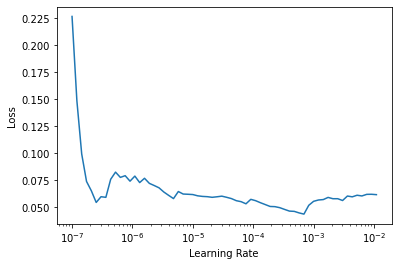

In [ ]:
learn34.lr_find()

In [ ]:
lr = 1e-5

In [ ]:
learn34.fit_one_cycle(10, slice(lr), pct_start=0.5)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.019400,0.015523,0.994953,0.705015,03:05
1,0.012976,0.011481,0.995995,0.770428,03:05
2,0.009020,0.010323,0.996442,0.804307,03:05
3,0.008207,0.008390,0.996878,0.840358,03:05
4,0.006801,0.007453,0.997264,0.858382,03:05
5,0.007475,0.007568,0.997307,0.849263,03:05
6,0.006459,0.007635,0.997366,0.853610,03:05
7,0.004994,0.006711,0.997617,0.874664,03:05
8,0.004754,0.006804,0.997624,0.873431,03:05
9,0.004446,0.006820,0.997648,0.874706,03:05


In [ ]:
learn34.save('stage34-1-big')

Path('saved_model/models/stage34-1-big.pth')

In [ ]:
learn34.load('stage34-1-big')

In [ ]:
learn34.unfreeze()

In [ ]:
lrs = slice(1e-6, lr/10)

In [ ]:
learn34.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.005553,0.006603,0.997686,0.876911,03:20
1,0.005119,0.006604,0.997697,0.878334,03:20
2,0.004406,0.006890,0.997666,0.873854,03:20
3,0.005013,0.006766,0.997708,0.877957,03:20
4,0.004829,0.006662,0.997757,0.881209,03:20
5,0.004489,0.006562,0.997747,0.881016,03:20
6,0.004639,0.006377,0.997761,0.881936,03:20
7,0.004507,0.006533,0.997774,0.881739,03:19
8,0.004712,0.006652,0.997770,0.881512,03:19
9,0.004460,0.006506,0.997768,0.882019,03:19


In [ ]:
learn34.save('stage34-2-big')

Path('saved_model/models/stage34-2-big.pth')

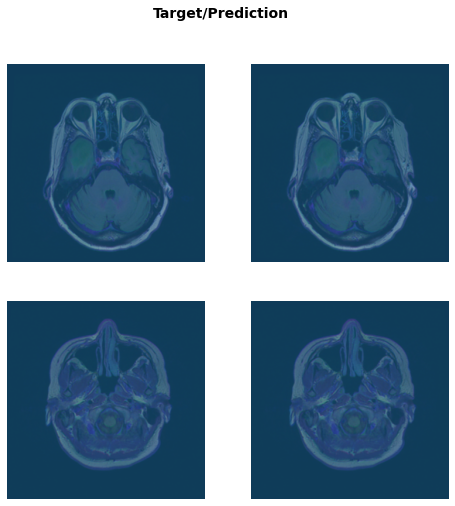

In [ ]:
learn34.show_results(figsize=(8, 8))

### ResNet50

#### Half size

In [ ]:
from fastai.vision.models import resnet50

learn50 = unet_learner(dls, resnet50, metrics=metrics, path=save_path)

SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=3.981071586167673e-06)

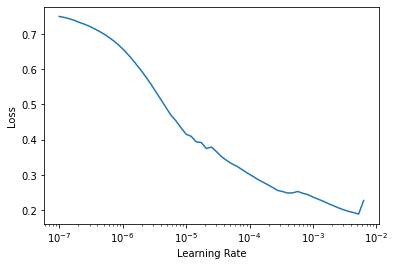

In [ ]:
learn50.lr_find()

In [ ]:
lr = 5e-5

In [ ]:
learn50.fit_one_cycle(10, slice(lr)) 

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.019847,0.019097,0.994487,0.641244,11:03
1,0.012651,0.009677,0.996321,0.817117,11:00
2,0.009360,0.007789,0.997073,0.844976,10:59
3,0.006295,0.006733,0.997397,0.869718,10:59
4,0.005088,0.006259,0.997617,0.879512,10:59
5,0.004186,0.005925,0.997817,0.887762,10:59
6,0.004091,0.005916,0.997808,0.888955,10:59
7,0.003351,0.005984,0.997866,0.891368,10:59
8,0.002801,0.006152,0.997920,0.891431,10:59
9,0.003067,0.006185,0.997901,0.890829,10:59


In [ ]:
learn50.save('stage50-1')

Path('saved_model/models/stage50-1.pth')

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')
# copy it there
!cp /content/saved_model/models/stage50-1.pth "/content/drive/My Drive/"

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')
# copy it there
!cp "/content/drive/My Drive/stage50-1.pth" /content/saved_model/models/

In [ ]:
learn50.load('stage50-1')

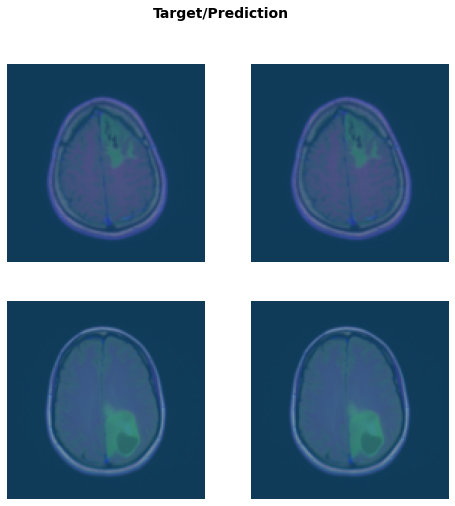

In [ ]:
learn50.show_results(max_n=8, figsize=(8,8))

In [ ]:
learn50.unfreeze()

In [ ]:
lrs = slice(lr/400, lr/4)

In [ ]:
learn50.fit_one_cycle(12, lrs)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.003301,0.003545,0.998650,0.938900,06:18
1,0.003820,0.003517,0.998639,0.938037,06:12
2,0.003628,0.003598,0.998587,0.935144,06:12
3,0.003096,0.003576,0.998599,0.936239,06:12
4,0.003033,0.003568,0.998616,0.937838,06:12
5,0.003090,0.003618,0.998595,0.935845,06:12
6,0.002770,0.003639,0.998605,0.936916,06:12
7,0.002601,0.003618,0.998608,0.936362,06:12
8,0.002548,0.003623,0.998608,0.937108,06:12
9,0.002454,0.003607,0.998618,0.937336,06:12


In [ ]:
learn50.save('stage50-2')

Path('saved_model/models/stage50-2.pth')

In [ ]:
!cp /content/saved_model/models/stage50-2.pth "/content/drive/My Drive/"

In [ ]:
import IPython.display as display
display.Audio(url="https://static.sfdict.com/audio/C07/C0702600.mp3", autoplay=True)

#### Full size

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')
# copy it there
!cp "/content/drive/My Drive/stage50-2.pth" /content/saved_model/models/

Mounted at /content/drive


In [ ]:
bs = 4

In [ ]:
tfms = [IntToFloatTensor(div_mask=255), Brightness(0.1, p=0.25), Zoom(max_zoom=1.1,p=0.25), Normalize.from_stats(*imagenet_stats)]

In [ ]:
dls = SegmentationDataLoaders.from_label_func(data_path, images, get_mask_path, batch_tfms=tfms, valid_pct=0.2, codes=codes, seed=42, bs=bs)

In [ ]:
from fastai.vision.models import resnet50

learn50 = unet_learner(dls, resnet50, metrics=metrics, path=save_path)

In [ ]:
learn50.load('stage50-2')

SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=6.309573450380412e-07)

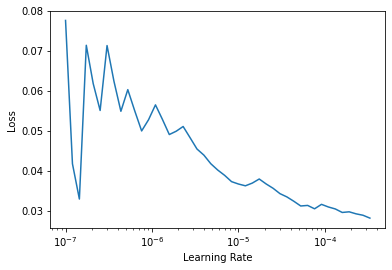

In [ ]:
learn50.lr_find()

In [ ]:
lr = 2e-5

In [ ]:
learn50.fit_one_cycle(10, slice(lr), pct_start=0.5)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.009062,0.010113,0.996213,0.841488,23:20
1,0.007520,0.006706,0.997406,0.878153,23:31
2,0.005603,0.006475,0.997494,0.888557,23:29
3,0.005341,0.005707,0.997804,0.899659,23:26
4,0.003846,0.005418,0.997949,0.904155,23:24
5,0.004767,0.005418,0.997978,0.907082,23:25
6,0.003903,0.004992,0.998036,0.911298,23:26
7,0.003111,0.005147,0.998127,0.912994,23:27
8,0.002601,0.005219,0.998188,0.916811,23:28
9,0.002692,0.005225,0.998142,0.915263,23:28


In [ ]:
learn50.save('stage50-1-big')

Path('saved_model/models/stage50-1-big.pth')

In [ ]:
!cp /content/saved_model/models/stage50-1-big.pth "/content/drive/My Drive/"

In [ ]:
learn50.load('stage50-1-big')

In [ ]:
learn50.unfreeze()

In [ ]:
lrs = slice(1e-6, lr/10)

In [ ]:
learn50.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.002251,0.005086,0.998174,0.916885,23:50
1,0.002509,0.005135,0.998170,0.916655,23:48
2,0.002383,0.004988,0.998154,0.915843,23:48
3,0.002636,0.005136,0.998161,0.916622,23:48
4,0.002323,0.005136,0.998169,0.916451,23:46
5,0.002210,0.005287,0.998176,0.916578,23:49
6,0.002323,0.005173,0.998189,0.917240,23:50
7,0.002312,0.005262,0.998182,0.917088,23:49
8,0.002429,0.005262,0.998190,0.917274,23:50
9,0.002116,0.005231,0.998192,0.917353,23:50


In [ ]:
learn50.save('stage50-2-big')

Path('saved_model/models/stage50-2-big.pth')

In [ ]:
!cp /content/saved_model/models/stage50-2-big.pth "/content/drive/My Drive/"

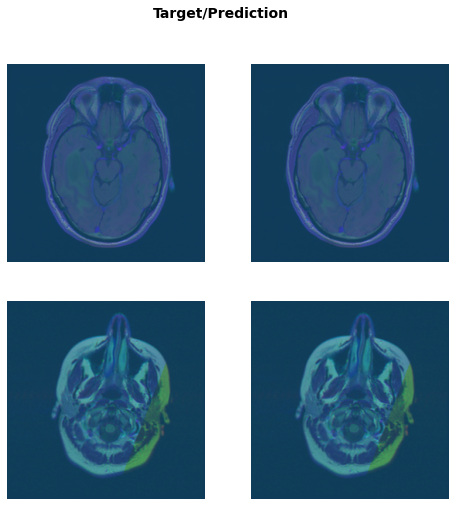

In [ ]:
learn50.show_results(figsize=(8, 8))

In [ ]:
import IPython.display as display
display.Audio(url="https://static.sfdict.com/audio/C07/C0702600.mp3", autoplay=True)

### ResNet 101

#### Half size

In [ ]:
from fastai.vision.models import resnet101

learn101 = unet_learner(dls, resnet101, metrics=metrics, path=save_path)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


SuggestedLRs(lr_min=0.00036307806149125097, lr_steep=5.754399353463668e-06)

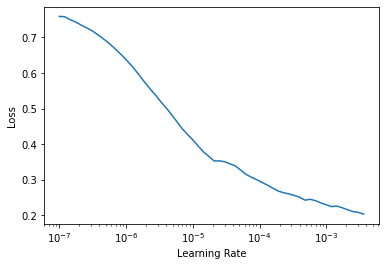

In [ ]:
learn101.lr_find()

In [ ]:
lr = 1e-5

In [ ]:
learn101.fit_one_cycle(10, slice(lr)) 

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.023396,0.041979,0.993716,0.621126,03:33
1,0.014872,0.072896,0.994118,0.622315,03:32
2,0.011444,0.013961,0.995205,0.709552,03:32
3,0.008391,0.055750,0.996406,0.813903,03:32
4,0.007072,0.027081,0.996932,0.846366,03:32
5,0.006569,0.024393,0.996818,0.829109,03:31
6,0.005841,0.012503,0.997181,0.855741,03:31
7,0.005400,0.008187,0.997334,0.869487,03:31
8,0.004566,0.023665,0.997252,0.859336,03:31
9,0.004478,0.006796,0.997421,0.870260,03:32


In [ ]:
learn101.save('stage101-1')

Path('saved_model/models/stage101-1.pth')

In [ ]:
# copy it there
# !cp /content/saved_model/models/stage101-1.pth "/content/drive/My Drive/"

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')
# copy it there
!cp "/content/drive/My Drive/stage101-1.pth" /content/saved_model/models/

Mounted at /content/drive


In [ ]:
learn101.load('stage101-1')

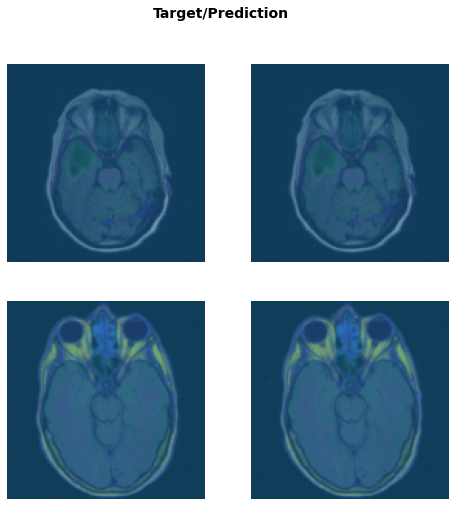

In [ ]:
learn101.show_results(max_n=8, figsize=(8,8))

In [ ]:
learn101.unfreeze()

In [ ]:
lrs = slice(lr/400, lr/4)

In [ ]:
learn101.fit_one_cycle(12, lrs)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.005360,0.024210,0.998044,0.890357,06:30
1,0.005057,0.033981,0.997995,0.889838,06:28
2,0.005964,0.005653,0.998106,0.901405,06:28
3,0.004600,0.004806,0.998228,0.906371,06:29
4,0.004930,0.005855,0.998136,0.896037,06:27
5,0.004928,0.035581,0.998041,0.891627,06:27
6,0.004509,0.005893,0.998228,0.904340,06:27
7,0.004339,0.004786,0.998270,0.904767,06:27
8,0.004226,0.005506,0.998275,0.906088,06:27
9,0.004393,0.041905,0.998046,0.893649,06:27


In [ ]:
learn101.save('stage101-2')

Path('saved_model/models/stage101-2.pth')

In [ ]:
!cp /content/saved_model/models/stage101-2.pth "/content/drive/My Drive/"

In [ ]:
import IPython.display as display
display.Audio(url="https://static.sfdict.com/audio/C07/C0702600.mp3", autoplay=True)

#### Full size

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# copy it there
!cp "/content/drive/My Drive/stage101-2.pth" /content/saved_model/models/

In [ ]:
bs = 4

In [ ]:
tfms = [IntToFloatTensor(div_mask=255), Brightness(0.1, p=0.25), Zoom(max_zoom=1.1, p=0.25), Normalize.from_stats(*imagenet_stats)]

In [ ]:
dls = SegmentationDataLoaders.from_label_func(data_path, images, get_mask_path, batch_tfms=tfms, valid_pct=0.2, codes=codes, seed=42, bs=bs)

In [ ]:
from fastai.vision.models import resnet50

learn101 = unet_learner(dls, resnet101, metrics=metrics, path=save_path)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
learn101.load('stage101-2')

SuggestedLRs(lr_min=4.365158383734525e-06, lr_steep=6.309573450380412e-07)

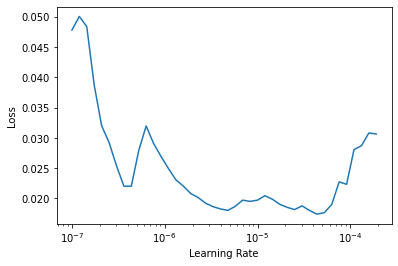

In [ ]:
learn101.lr_find()

In [ ]:
lr = 1e-5

In [ ]:
learn101.fit_one_cycle(10, slice(lr), pct_start=0.5)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.010834,0.027918,0.996040,0.765441,22:53
1,0.011564,0.033842,0.996494,0.801890,22:57
2,0.009047,0.051121,0.995646,0.719662,22:57
3,0.006985,0.017846,0.996921,0.825903,22:56
4,0.007419,0.012805,0.997310,0.851586,22:57
5,0.005668,0.051112,0.997240,0.846206,22:57
6,0.004910,0.007381,0.997774,0.881898,22:58
7,0.004054,0.014649,0.997410,0.854719,22:59
8,0.004313,0.011189,0.997683,0.873988,22:59
9,0.003270,0.008259,0.997793,0.881851,23:00


In [ ]:
learn101.save('stage101-1-big')

Path('saved_model/models/stage101-1-big.pth')

In [ ]:
!cp /content/saved_model/models/stage101-1-big.pth "/content/drive/My Drive/"

In [ ]:
!cp "/content/drive/My Drive/stage101-1-big.pth" "/content/saved_model/models/stage101-1-big.pth"

In [ ]:
learn101.load('stage101-1-big')

In [ ]:
learn101.unfreeze()

In [ ]:
lrs = slice(1e-6, lr/10)

In [ ]:
learn101.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.006820,0.010093,0.997706,0.879033,06:44
1,0.005503,0.010815,0.997824,0.885576,06:37
2,0.005615,0.009868,0.997887,0.890117,06:37
3,0.005142,0.006992,0.997948,0.890795,06:36
4,0.004897,0.006333,0.998028,0.897212,06:36
5,0.004837,0.007056,0.998046,0.898552,06:37
6,0.004419,0.006225,0.998066,0.898562,06:37
7,0.004695,0.005385,0.998110,0.901967,06:37
8,0.004582,0.008453,0.997991,0.894277,06:37
9,0.004404,0.005970,0.998088,0.900202,06:37


In [ ]:
learn101.save('stage101-2-big')

Path('saved_model/models/stage101-2-big.pth')

In [ ]:
!cp /content/saved_model/models/stage101-2-big.pth "/content/drive/My Drive/"

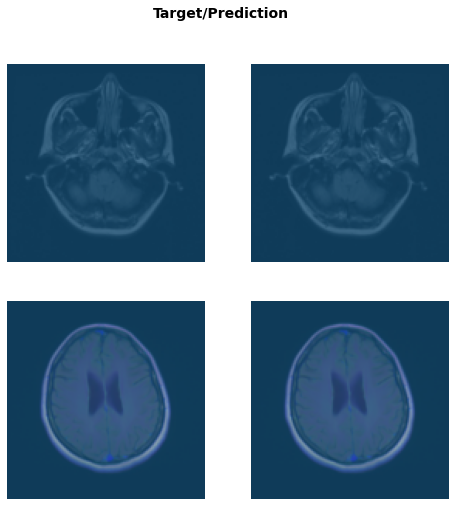

In [ ]:
learn101.show_results(figsize=(8, 8))

In [ ]:
import IPython.display as display
display.Audio(url="https://static.sfdict.com/audio/C07/C0702600.mp3", autoplay=True)

### ResNet 152

#### Half size

In [ ]:
from fastai.vision.models import resnet152

learn152 = unet_learner(dls, resnet152, metrics=metrics, path=save_path)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=5.754399353463668e-06)

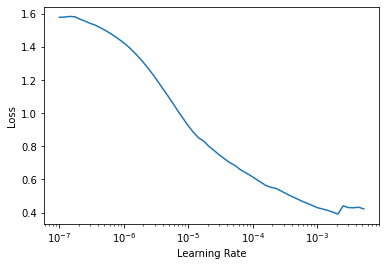

In [ ]:
learn152.lr_find()

In [ ]:
lr = 1e-5

In [ ]:
learn152.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.027878,0.019721,0.993734,0.660024,12:22
1,0.019586,0.013375,0.995095,0.743928,12:19
2,0.011463,0.011412,0.995825,0.774985,12:20
3,0.010095,0.009655,0.996700,0.844083,12:19
4,0.008043,0.009352,0.996656,0.825315,12:19
5,0.006481,0.007764,0.997201,0.861322,12:17
6,0.005642,0.007740,0.997295,0.867714,12:16
7,0.004842,0.006900,0.997507,0.880565,12:17
8,0.004343,0.007256,0.997440,0.874624,12:17
9,0.004700,0.007067,0.997481,0.878975,12:16


In [ ]:
learn152.save('stage152-1')

Path('saved_model/models/stage152-1.pth')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/saved_model/models/stage152-1.pth" "/content/drive/My Drive/"

In [ ]:
import IPython.display as display
display.Audio(url="https://static.sfdict.com/audio/C07/C0702600.mp3", autoplay=True)

In [ ]:
learn152.load('stage152-1')

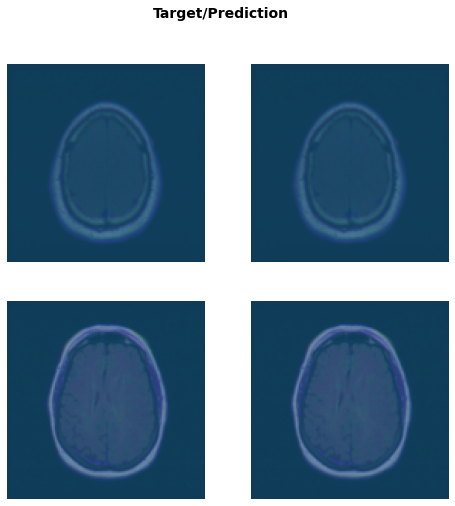

In [ ]:
learn152.show_results(max_n=8, figsize=(8,8))

In [ ]:
learn152.unfreeze()

In [ ]:
lrs = slice(lr/400, lr/4)

In [ ]:
learn152.fit_one_cycle(12, lrs)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.004099,0.007238,0.997456,0.878048,13:25
1,0.004961,0.006885,0.997502,0.882366,13:20
2,0.004538,0.006946,0.997507,0.878503,13:20
3,0.004850,0.007369,0.997443,0.875444,13:21
4,0.004410,0.006812,0.997566,0.883051,13:20
5,0.004390,0.006941,0.997444,0.882929,13:20
6,0.003972,0.006890,0.997561,0.883338,13:20
7,0.004400,0.007158,0.997554,0.881241,13:22
8,0.003563,0.006802,0.997613,0.885598,13:27
9,0.003967,0.006707,0.997621,0.886473,13:27


In [ ]:
learn152.save('stage152-2')

Path('saved_model/models/stage152-2.pth')

In [ ]:
!cp /content/saved_model/models/stage152-2.pth "/content/drive/My Drive/"

In [ ]:
import IPython.display as display
display.Audio(url="https://static.sfdict.com/audio/C07/C0702600.mp3", autoplay=True)

#### Full size

In [ ]:
bs = 4

In [ ]:
tfms = [IntToFloatTensor(div_mask=255), Brightness(0.1, p=0.25), Zoom(max_zoom=1.1, p=0.25), Normalize.from_stats(*imagenet_stats)]

In [ ]:
dls = SegmentationDataLoaders.from_label_func(data_path, images, get_mask_path, batch_tfms=tfms, valid_pct=0.2, codes=codes, seed=42, bs=bs)

In [ ]:
from fastai.vision.models import resnet152

learn152 = unet_learner(dls, resnet152, metrics=metrics, path=save_path)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/stage152-2.pth" "/content/saved_model/models/stage152-2.pth"

In [ ]:
learn152.load('stage152-2')

SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=6.309573450380412e-07)

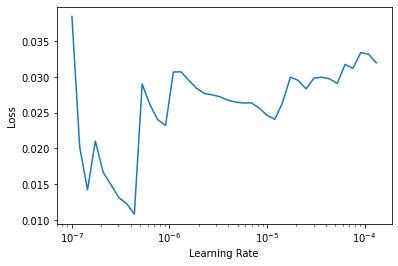

In [ ]:
learn152.lr_find()

In [ ]:
lr = 1e-5

In [ ]:
learn152.fit_one_cycle(10, slice(lr), pct_start=0.5)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.010486,0.009832,0.996379,0.823152,23:44
1,0.010083,0.009147,0.996730,0.842075,23:48
2,0.008320,0.009081,0.997006,0.851021,23:48
3,0.006642,0.007606,0.997308,0.874677,23:45
4,0.005948,0.008858,0.997204,0.863799,23:44
5,0.005781,0.006167,0.997704,0.892100,23:42
6,0.004688,0.005840,0.997790,0.897144,23:45
7,0.003908,0.006359,0.997758,0.893757,23:47
8,0.003502,0.006514,0.997755,0.893103,23:45
9,0.003558,0.006145,0.997835,0.897315,23:44


In [ ]:
learn152.save('stage152-1-big')

Path('saved_model/models/stage152-1-big.pth')

In [ ]:
!cp /content/saved_model/models/stage152-1-big.pth "/content/drive/My Drive/"

In [ ]:
!cp "/content/drive/My Drive/stage152-1-big.pth" "/content/saved_model/models/"

In [ ]:
learn152.load('stage152-1-big')

In [ ]:
learn152.unfreeze()

In [ ]:
lrs = slice(1e-6, lr/10)

In [ ]:
learn152.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_brain,dice,time
0,0.003698,0.003617,0.998573,0.930164,25:34
1,0.003403,0.003600,0.998574,0.930825,25:16
2,0.004145,0.003868,0.998489,0.924578,25:14
3,0.003812,0.003571,0.998589,0.931284,25:14
4,0.003211,0.003597,0.998565,0.929998,25:13
5,0.003677,0.003584,0.998577,0.931059,25:14
6,0.002777,0.003647,0.998586,0.930839,25:13
7,0.003400,0.003612,0.998595,0.931243,25:12
8,0.003303,0.003582,0.998583,0.930573,25:13
9,0.003210,0.003659,0.998572,0.930061,25:12


In [ ]:
learn152.save('stage152-2-big')

Path('saved_model/models/stage152-2-big.pth')

In [ ]:
!cp /content/saved_model/models/stage152-2-big.pth "/content/drive/My Drive/"

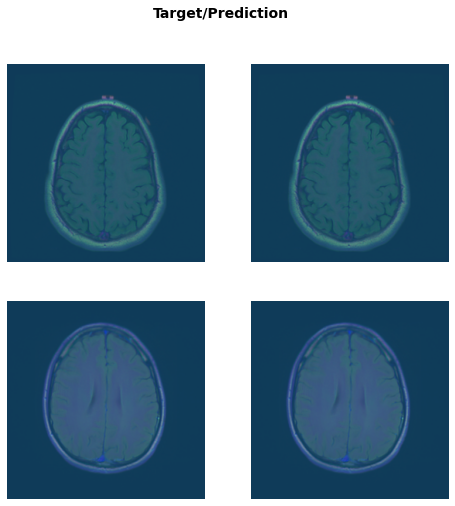

In [ ]:
learn152.show_results(figsize=(8, 8))

In [ ]:
import IPython.display as display
display.Audio(url="https://static.sfdict.com/audio/C07/C0702600.mp3", autoplay=True)